<a href="https://colab.research.google.com/github/0Sensei2/Deep-Learning/blob/main/YOLOv8%20Alat%20Musik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
!pip install roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="JrvZCt8u03mDHWkb28Ty")
project = rf.workspace("0sensei2").project("deep-learning-nnmtz")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deep-Learning-2 in yolov8:: 100%|██████████| 3962/3962 [00:00<00:00, 5825.03it/s]


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Load model YOLOv8
model = YOLO("yolov8n.pt")  # Gunakan model pre-trained YOLOv8n

# Path ke dataset yang telah didownload dari Roboflow
dataset_path = os.path.join("Deep-Learning-2", "data.yaml")

100%|██████████| 6.25M/6.25M [00:00<00:00, 167MB/s]


In [4]:
# Training model
results = model.train(
    data=dataset_path,
    epochs=50,
    imgsz=640,
    batch=8,
    name="alatmusik",
    plots=True  # Untuk menghasilkan plot training dan confusion matrix
)

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Deep-Learning-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=alatmusik, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 36.3MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 396.8±91.7 MB/s, size: 14.6 KB)


train: Scanning /content/Deep-Learning-2/train/labels... 1728 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1728/1728 [00:00<00:00, 2125.30it/s]


train: New cache created: /content/Deep-Learning-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 332.2±139.4 MB/s, size: 11.8 KB)


val: Scanning /content/Deep-Learning-2/valid/labels... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<00:00, 2085.15it/s]

val: New cache created: /content/Deep-Learning-2/valid/labels.cache


Plotting labels to runs/detect/alatmusik/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/alatmusik
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.09G     0.9684       2.47      1.615         27        640: 100%|██████████| 216/216 [00:36<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]

                   all        165        166      0.636      0.566      0.618      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.34G     0.9524      1.854      1.561         29        640: 100%|██████████| 216/216 [00:34<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.93it/s]


                   all        165        166      0.475      0.511      0.569      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.35G     0.9487       1.72      1.563         26        640: 100%|██████████| 216/216 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.89it/s]

                   all        165        166       0.64      0.431      0.444      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.37G     0.9083      1.554      1.532         25        640: 100%|██████████| 216/216 [00:33<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.88it/s]

                   all        165        166      0.734      0.615       0.65      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.39G     0.9072      1.497       1.54         22        640: 100%|██████████| 216/216 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.67it/s]


                   all        165        166      0.741      0.663      0.737      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.4G     0.8904      1.447      1.512         21        640: 100%|██████████| 216/216 [00:32<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.67it/s]

                   all        165        166        0.7      0.669      0.686        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.42G     0.8908      1.357      1.521         25        640: 100%|██████████| 216/216 [00:33<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.75it/s]

                   all        165        166      0.706      0.796      0.799      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.44G     0.8579      1.326      1.489         27        640: 100%|██████████| 216/216 [00:34<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.56it/s]


                   all        165        166      0.845      0.798      0.855      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.46G     0.8283       1.25      1.478         26        640: 100%|██████████| 216/216 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]

                   all        165        166      0.776      0.757      0.848      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.47G     0.8325      1.232      1.471         18        640: 100%|██████████| 216/216 [00:32<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.80it/s]

                   all        165        166      0.877      0.813      0.903      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.49G     0.8065      1.183      1.461         20        640: 100%|██████████| 216/216 [00:33<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.02it/s]

                   all        165        166      0.797      0.805       0.82      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.51G     0.8328      1.199       1.46         29        640: 100%|██████████| 216/216 [00:33<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.68it/s]

                   all        165        166      0.811      0.754      0.859      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.52G     0.8069      1.175      1.444         28        640: 100%|██████████| 216/216 [00:32<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]

                   all        165        166      0.888      0.857      0.893      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.54G     0.8108       1.14      1.456         24        640: 100%|██████████| 216/216 [00:33<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.78it/s]

                   all        165        166      0.802      0.801      0.875       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.56G     0.7925      1.097       1.43         27        640: 100%|██████████| 216/216 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.61it/s]


                   all        165        166      0.949      0.877      0.942      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.57G     0.7582      1.083       1.42         19        640: 100%|██████████| 216/216 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]

                   all        165        166      0.923      0.892      0.925      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.59G     0.7661      1.056      1.414         28        640: 100%|██████████| 216/216 [00:33<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.76it/s]


                   all        165        166      0.786      0.846      0.902      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.61G     0.7551      1.066      1.412         27        640: 100%|██████████| 216/216 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.44it/s]

                   all        165        166      0.906      0.875      0.912      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.63G     0.7672      1.028      1.422         25        640: 100%|██████████| 216/216 [00:34<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.61it/s]

                   all        165        166      0.937      0.877      0.928      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.64G     0.7359      1.014      1.396         19        640: 100%|██████████| 216/216 [00:33<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.25it/s]

                   all        165        166      0.882      0.913      0.951      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.66G     0.7443     0.9699      1.399         22        640: 100%|██████████| 216/216 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.81it/s]

                   all        165        166      0.908      0.933      0.956       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.68G     0.7292      0.971      1.386         26        640: 100%|██████████| 216/216 [00:33<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.75it/s]

                   all        165        166      0.912      0.879      0.935      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.69G     0.7289     0.9779      1.394         30        640: 100%|██████████| 216/216 [00:33<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.85it/s]

                   all        165        166      0.914      0.935      0.965      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.71G     0.7064     0.9518      1.374         21        640: 100%|██████████| 216/216 [00:33<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.66it/s]

                   all        165        166      0.906      0.916      0.955      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.73G     0.7073     0.9358      1.382         26        640: 100%|██████████| 216/216 [00:34<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.95it/s]

                   all        165        166      0.892      0.884      0.933      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.75G     0.7153     0.9128      1.383         25        640: 100%|██████████| 216/216 [00:33<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.49it/s]

                   all        165        166       0.94      0.942      0.964      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.76G     0.7141     0.9105       1.37         30        640: 100%|██████████| 216/216 [00:32<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.98it/s]

                   all        165        166       0.94      0.909      0.969      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.78G     0.7112     0.8927      1.379         23        640: 100%|██████████| 216/216 [00:32<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.07it/s]

                   all        165        166      0.961      0.922      0.965      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.8G     0.6825     0.8703      1.343         21        640: 100%|██████████| 216/216 [00:34<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.97it/s]

                   all        165        166      0.946      0.946       0.98       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.81G     0.7263     0.8721      1.384         26        640: 100%|██████████| 216/216 [00:34<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.64it/s]

                   all        165        166      0.953      0.927      0.962      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.83G     0.6791     0.8395      1.349         21        640: 100%|██████████| 216/216 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.69it/s]

                   all        165        166      0.939      0.938      0.965      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.85G     0.6857     0.8687      1.347         25        640: 100%|██████████| 216/216 [00:33<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.88it/s]

                   all        165        166      0.949      0.949       0.97      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.87G     0.6696     0.8322      1.342         21        640: 100%|██████████| 216/216 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.60it/s]


                   all        165        166      0.924      0.967      0.965      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.88G     0.6665     0.8247      1.332         20        640: 100%|██████████| 216/216 [00:33<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.29it/s]

                   all        165        166      0.962       0.94      0.963      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.9G     0.6599     0.8227       1.33         24        640: 100%|██████████| 216/216 [00:32<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.66it/s]

                   all        165        166      0.957      0.943      0.974      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.92G       0.67     0.7903      1.332         21        640: 100%|██████████| 216/216 [00:34<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.87it/s]

                   all        165        166       0.91      0.956      0.963      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.93G     0.6482     0.7876      1.324         25        640: 100%|██████████| 216/216 [00:34<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.57it/s]

                   all        165        166      0.957      0.941      0.978      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.95G     0.6405     0.7704      1.318         20        640: 100%|██████████| 216/216 [00:33<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]

                   all        165        166      0.942      0.926       0.97      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.97G     0.6577     0.7713      1.325         22        640: 100%|██████████| 216/216 [00:33<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.73it/s]

                   all        165        166      0.965      0.945      0.968      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.98G     0.6084     0.7515      1.296         25        640: 100%|██████████| 216/216 [00:34<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.60it/s]

                   all        165        166      0.957      0.958       0.98      0.613


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         2G       0.66      0.496      1.504          8        640: 100%|██████████| 216/216 [00:34<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.93it/s]

                   all        165        166      0.933      0.942      0.967      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.02G     0.6222     0.4471      1.458         10        640: 100%|██████████| 216/216 [00:31<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.99it/s]

                   all        165        166       0.95      0.958      0.979      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.04G     0.6155     0.4224      1.448          8        640: 100%|██████████| 216/216 [00:32<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.94it/s]

                   all        165        166      0.968      0.949       0.98      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.05G     0.6133     0.4173      1.434          8        640: 100%|██████████| 216/216 [00:31<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.38it/s]

                   all        165        166      0.959      0.971      0.982       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.07G     0.5828     0.3931      1.411          8        640: 100%|██████████| 216/216 [00:31<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.63it/s]

                   all        165        166      0.954      0.945      0.973      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.09G     0.5823     0.3921      1.418          8        640: 100%|██████████| 216/216 [00:32<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.91it/s]

                   all        165        166      0.972      0.962      0.987      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.1G     0.5551     0.3875      1.376          8        640: 100%|██████████| 216/216 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.57it/s]

                   all        165        166       0.96      0.942      0.986       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.12G     0.5553     0.3732      1.387          9        640: 100%|██████████| 216/216 [00:32<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.60it/s]

                   all        165        166      0.945      0.963      0.986      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.5555     0.3647      1.375          8        640: 100%|██████████| 216/216 [00:31<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.73it/s]

                   all        165        166      0.959      0.966      0.988      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G     0.5305     0.3509      1.363          8        640: 100%|██████████| 216/216 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.94it/s]

                   all        165        166      0.961      0.949      0.987      0.641



50 epochs completed in 0.487 hours.
Optimizer stripped from runs/detect/alatmusik/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/alatmusik/weights/best.pt, 6.2MB

Validating runs/detect/alatmusik/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.10it/s]


                   all        165        166      0.939      0.963      0.986      0.642
                 Gitar         49         49      0.976       0.98      0.993      0.719
             Harmonika         41         41      0.951      0.943      0.988      0.557
                 Piano         37         37      0.973          1      0.995      0.661
                Suling         38         39      0.858      0.931      0.966      0.632
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/alatmusik


In [5]:
import cv2
import os
import glob

# 1. Validasi Model dan Tampilkan Metrik
print("\nMelakukan validasi model...")
metrics = model.val()

# Print semua metrik yang tersedia untuk verifikasi
print("\nAll available metrics:")
print(metrics.results_dict)

# Akses metrik berdasarkan struktur yang diberikan
print("\nValidation Metrics:")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")


Melakukan validasi model...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 428.5±186.1 MB/s, size: 12.1 KB)


val: Scanning /content/Deep-Learning-2/valid/labels.cache... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  8.70it/s]


                   all        165        166       0.94      0.963      0.985      0.643
                 Gitar         49         49      0.979       0.98      0.993      0.719
             Harmonika         41         41      0.951      0.943      0.987      0.557
                 Piano         37         37      0.973          1      0.995      0.663
                Suling         38         39      0.858       0.93      0.966      0.632
Speed: 1.5ms preprocess, 5.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/alatmusik2

All available metrics:
{'metrics/precision(B)': np.float64(0.9399922284726924), 'metrics/recall(B)': np.float64(0.9631223832738907), 'metrics/mAP50(B)': np.float64(0.9853098815443894), 'metrics/mAP50-95(B)': np.float64(0.6428730114707333), 'fitness': np.float64(0.677116698478099)}

Validation Metrics:
Precision: 0.9400
Recall: 0.9631
mAP50: 0.9853



Melakukan prediksi pada gambar validasi...

image 1/1 /content/Deep-Learning-2/valid/images/suling-7-_jpeg.rf.017cd4e600bff1d53ec48e3837803d07.jpg: 640x640 1 Suling, 7.4ms
Speed: 4.0ms preprocess, 7.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Deep-Learning-2/valid/images/piano-171-_jpeg.rf.b514294b3d554ef5bacebb0959293073.jpg: 640x640 1 Piano, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Deep-Learning-2/valid/images/a-61-_jpg.rf.d43d7531067f7f6e440a4b1ea86a325d.jpg: 640x640 1 Gitar, 1 Harmonika, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Deep-Learning-2/valid/images/piano-107-_jpg.rf.9f18e8e91138cc0d5d86dcd3e8583b9b.jpg: 640x640 1 Piano, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Deep-Learning-2/valid/images/s

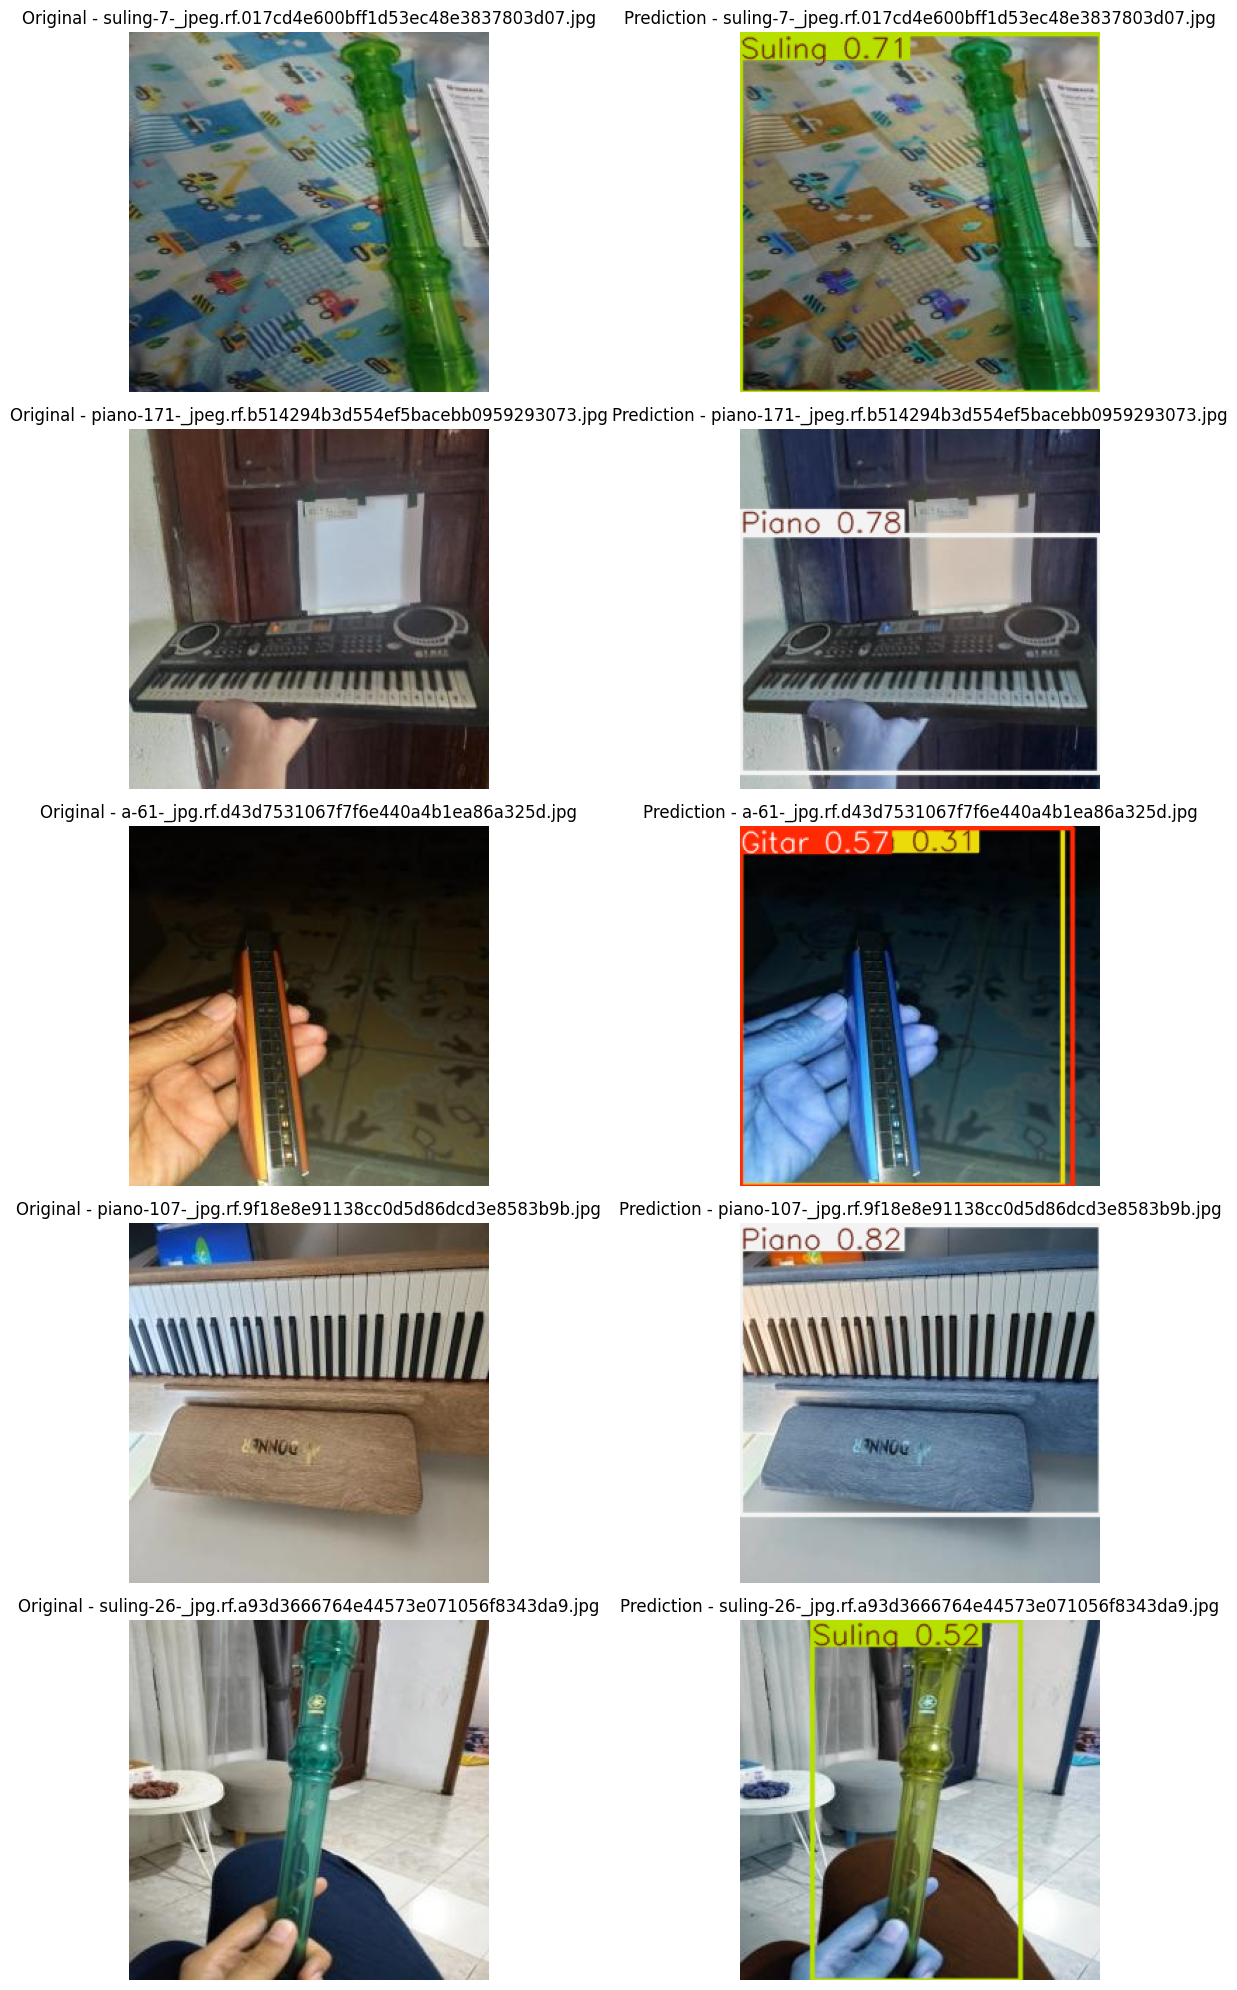


Menyimpan hasil prediksi...
Disimpan: prediction_results/pred_suling-7-_jpeg.rf.017cd4e600bff1d53ec48e3837803d07.jpg
Disimpan: prediction_results/pred_piano-171-_jpeg.rf.b514294b3d554ef5bacebb0959293073.jpg
Disimpan: prediction_results/pred_a-61-_jpg.rf.d43d7531067f7f6e440a4b1ea86a325d.jpg
Disimpan: prediction_results/pred_piano-107-_jpg.rf.9f18e8e91138cc0d5d86dcd3e8583b9b.jpg
Disimpan: prediction_results/pred_suling-26-_jpg.rf.a93d3666764e44573e071056f8343da9.jpg


In [6]:
# 2. Prediksi dan Visualisasi pada Gambar Validasi
val_images_path = os.path.join("Deep-Learning-2", "valid", "images")
val_images = glob.glob(os.path.join(val_images_path, "*.jpg"))[:5]  # Ambil 5 gambar pertama

def plot_predictions(images, predictions, rows=5, cols=2, figsize=(15, 20)):
    plt.figure(figsize=figsize)
    for i, (img_path, pred) in enumerate(zip(images, predictions)):
        # Plot gambar asli
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, 2*i+1)
        plt.imshow(img)
        plt.title(f"Original - {os.path.basename(img_path)}")
        plt.axis('off')

        # Plot prediksi
        plotted_img = pred[0].plot()
        plt.subplot(rows, cols, 2*i+2)
        plt.imshow(plotted_img)
        plt.title(f"Prediction - {os.path.basename(img_path)}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\nMelakukan prediksi pada gambar validasi...")
predictions = [model.predict(img) for img in val_images]

print("\nMenampilkan hasil prediksi...")
plot_predictions(val_images, predictions)

# 3. Simpan Hasil Prediksi
output_dir = "prediction_results"
os.makedirs(output_dir, exist_ok=True)

print("\nMenyimpan hasil prediksi...")
for i, (img_path, pred) in enumerate(zip(val_images, predictions)):
    pred_img = pred[0].plot()
    pred_img = cv2.cvtColor(pred_img, cv2.COLOR_RGB2BGR)
    output_path = os.path.join(output_dir, f"pred_{os.path.basename(img_path)}")
    cv2.imwrite(output_path, pred_img)
    print(f"Disimpan: {output_path}")


Menampilkan hasil training...


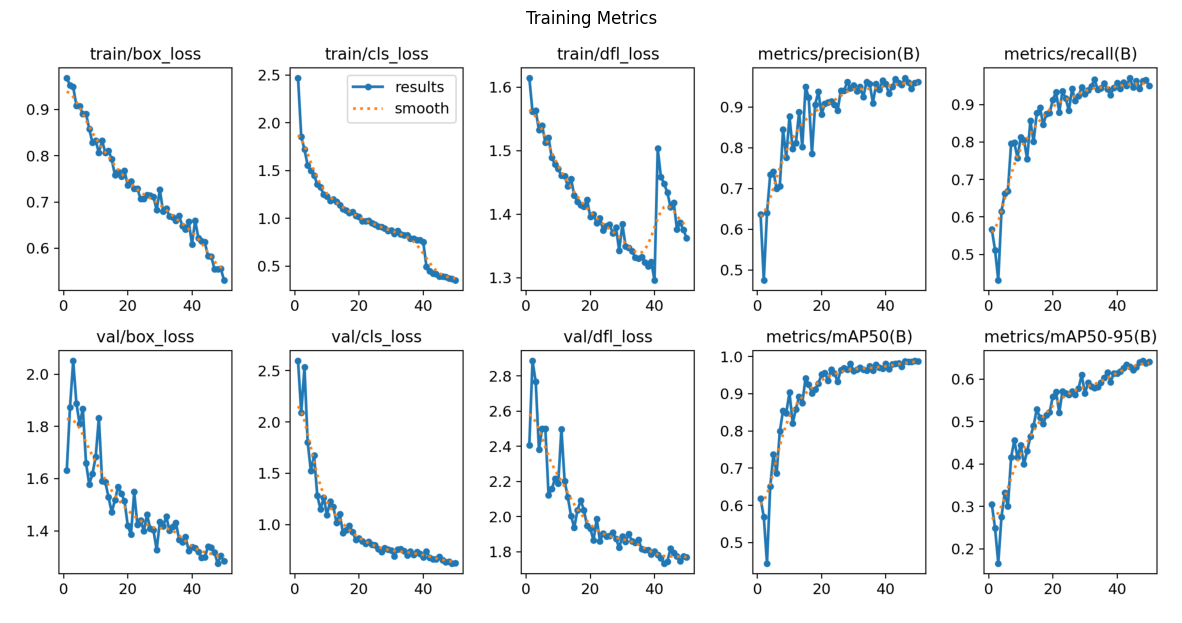

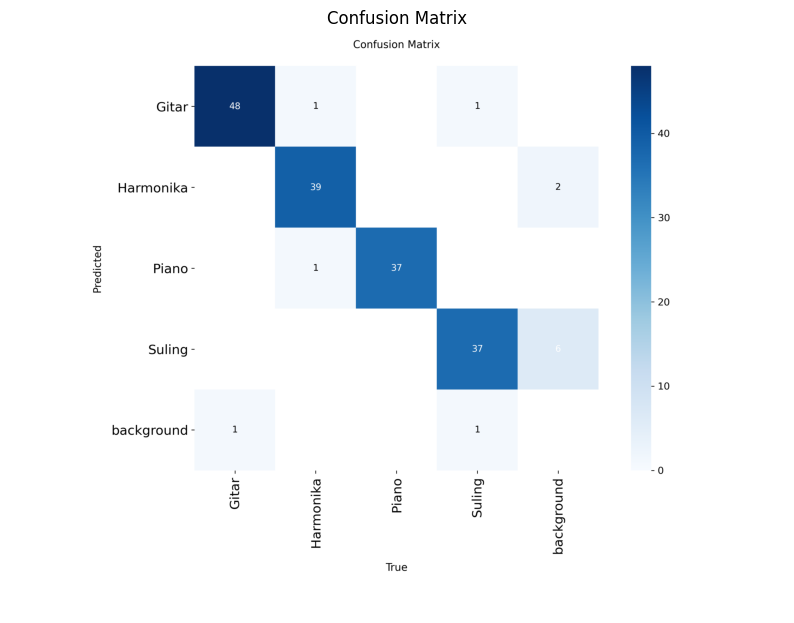


Proses selesai!


In [7]:
# 4. Tampilkan Confusion Matrix dan Plot Training
results_path = "runs/detect/alatmusik"

def display_training_results():
    # Plot training results
    training_results = os.path.join(results_path, "results.png")
    confusion_matrix = os.path.join(results_path, "confusion_matrix.png")

    if os.path.exists(training_results):
        img = plt.imread(training_results)
        plt.figure(figsize=(15, 10))
        plt.imshow(img)
        plt.title("Training Metrics")
        plt.axis('off')
        plt.show()
    else:
        print("File hasil training tidak ditemukan")

    if os.path.exists(confusion_matrix):
        img = plt.imread(confusion_matrix)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title("Confusion Matrix")
        plt.axis('off')
        plt.show()
    else:
        print("File confusion matrix tidak ditemukan")

print("\nMenampilkan hasil training...")
display_training_results()

print("\nProses selesai!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total gambar yang akan diproses: 14

0: 640x384 1 Suling, 13.1ms
Speed: 3.2ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Gambar hasil disimpan di: /content/drive/MyDrive/detected_results/detected_TES (1).jpg

0: 640x512 (no detections), 10.0ms
Speed: 4.1ms preprocess, 10.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)
Gambar hasil disimpan di: /content/drive/MyDrive/detected_results/detected_TES (5).jpg

0: 640x480 1 Suling, 9.1ms
Speed: 4.1ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Gambar hasil disimpan di: /content/drive/MyDrive/detected_results/detected_TES (6).jpg

0: 640x288 (no detections), 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 288)
Gambar hasil disimpan di: /content/drive/MyDrive/detected_

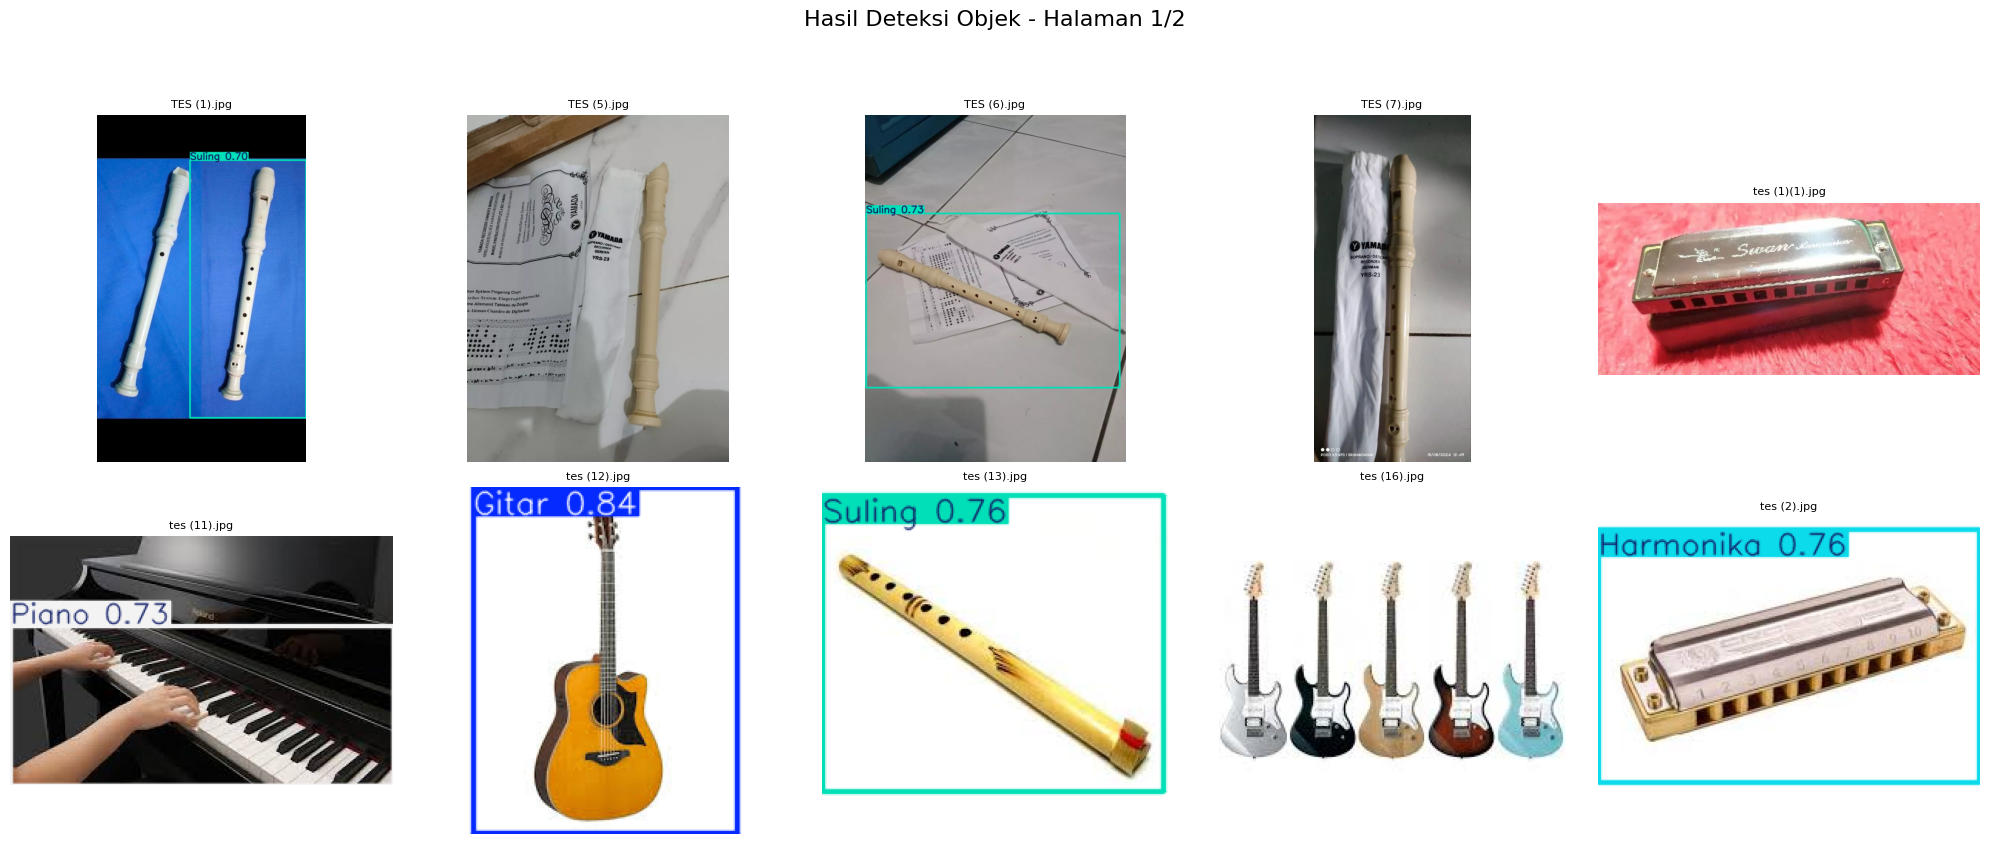


Informasi Deteksi - Halaman 1:

0: 640x384 1 Suling, 11.7ms
Speed: 3.4ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)

Gambar: TES (1).jpg
  Suling: conf=0.70, bbox=[288, 141, 648, 943]

0: 640x512 (no detections), 9.5ms
Speed: 4.0ms preprocess, 9.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)

Gambar: TES (5).jpg

0: 640x480 1 Suling, 8.6ms
Speed: 3.7ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

Gambar: TES (6).jpg
  Suling: conf=0.73, bbox=[3, 306, 790, 849]

0: 640x288 (no detections), 8.8ms
Speed: 2.3ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 288)

Gambar: TES (7).jpg

0: 288x640 (no detections), 10.6ms
Speed: 1.2ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)

Gambar: tes (1)(1).jpg

0: 448x640 1 Piano, 10.6ms
Speed: 3.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640

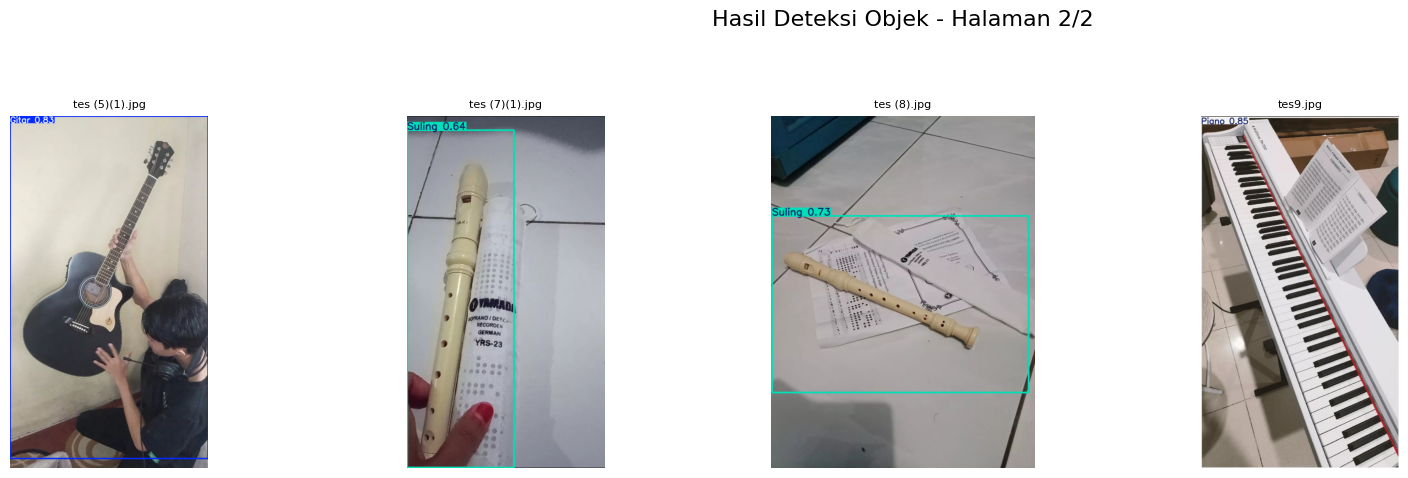


Informasi Deteksi - Halaman 2:

0: 640x384 1 Gitar, 12.9ms
Speed: 2.6ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

Gambar: tes (5)(1).jpg
  Gitar: conf=0.83, bbox=[0, 0, 720, 1245]

0: 640x384 1 Suling, 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

Gambar: tes (7)(1).jpg
  Suling: conf=0.64, bbox=[0, 44, 327, 1079]

0: 640x480 1 Suling, 10.7ms
Speed: 4.3ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

Gambar: tes (8).jpg
  Suling: conf=0.73, bbox=[3, 306, 790, 849]

0: 640x384 1 Piano, 9.3ms
Speed: 2.5ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

Gambar: tes9.jpg
  Piano: conf=0.85, bbox=[0, 4, 720, 1280]


In [10]:
import math
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from ultralytics import YOLO

# Load model yang telah dilatih
model = YOLO("runs/detect/alatmusik/weights/best.pt")  # Pastikan path model benar

def process_and_plot_images(image_paths, output_folder, conf_threshold=0.5, rows=2, cols=5):
    """
    Memproses gambar, menyimpan hasil deteksi ke folder output, dan menampilkan hasil dalam grid layout

    Parameters:
        image_paths (list): List path gambar yang akan diproses
        output_folder (str): Path folder untuk menyimpan gambar hasil
        conf_threshold (float): Threshold confidence (0-1)
        rows (int): Jumlah baris dalam grid
        cols (int): Jumlah kolom dalam grid
    """
    # Buat folder output jika belum ada
    os.makedirs(output_folder, exist_ok=True)

    total_images = len(image_paths)
    num_pages = math.ceil(total_images / (rows * cols))

    for page in range(num_pages):
        plt.figure(figsize=(20, 8))
        plt.suptitle(f'Hasil Deteksi Objek - Halaman {page+1}/{num_pages}', fontsize=16, y=1.05)

        start_idx = page * rows * cols
        end_idx = min((page + 1) * rows * cols, total_images)

        for i, img_path in enumerate(image_paths[start_idx:end_idx]):
            # Baca dan proses gambar
            img = cv2.imread(img_path)
            if img is None:
                print(f"Error: Gambar tidak ditemukan di {img_path}")
                continue

            results = model.predict(source=img, conf=conf_threshold)
            annotated_img = results[0].plot()
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

            # Simpan gambar hasil deteksi
            output_path = os.path.join(output_folder, f"detected_{os.path.basename(img_path)}")
            cv2.imwrite(output_path, annotated_img)
            print(f"Gambar hasil disimpan di: {output_path}")

            # Tampilkan di grid
            plt.subplot(rows, cols, i+1)
            plt.imshow(annotated_img_rgb)
            plt.title(os.path.basename(img_path), fontsize=8)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Tampilkan informasi deteksi untuk halaman ini
        print(f"\nInformasi Deteksi - Halaman {page+1}:")
        for img_path in image_paths[start_idx:end_idx]:
            img = cv2.imread(img_path)
            if img is None:
                continue

            results = model.predict(source=img, conf=conf_threshold)
            print(f"\nGambar: {os.path.basename(img_path)}")
            for box in results[0].boxes:
                print(f"  {model.names[int(box.cls)]}: conf={box.conf.item():.2f}, bbox={[round(x) for x in box.xyxy[0].tolist()]}")

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder testfoto di Google Drive
test_folder = "/content/drive/MyDrive/testfoto"

# Path ke folder output untuk menyimpan hasil
output_folder = "/content/drive/MyDrive/detected_results"

# Dapatkan semua file gambar di folder
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
image_files = sorted([f for f in os.listdir(test_folder)
                     if os.path.isfile(os.path.join(test_folder, f))
                     and os.path.splitext(f)[1].lower() in image_extensions])

if not image_files:
    print(f"Tidak ditemukan gambar di {test_folder}")
else:
    full_paths = [os.path.join(test_folder, f) for f in image_files]
    print(f"Total gambar yang akan diproses: {len(full_paths)}")

    # Proses dan tampilkan dalam grid 2x5, simpan hasil ke folder output
    process_and_plot_images(full_paths, output_folder, conf_threshold=0.6, rows=2, cols=5)

Memulai proses prediksi pada video...

0: 640x384 1 Gitar, 10.8ms
Speed: 4.5ms preprocess, 10.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 7.7ms
Speed: 3.2ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 1.6ms postprocess per image 

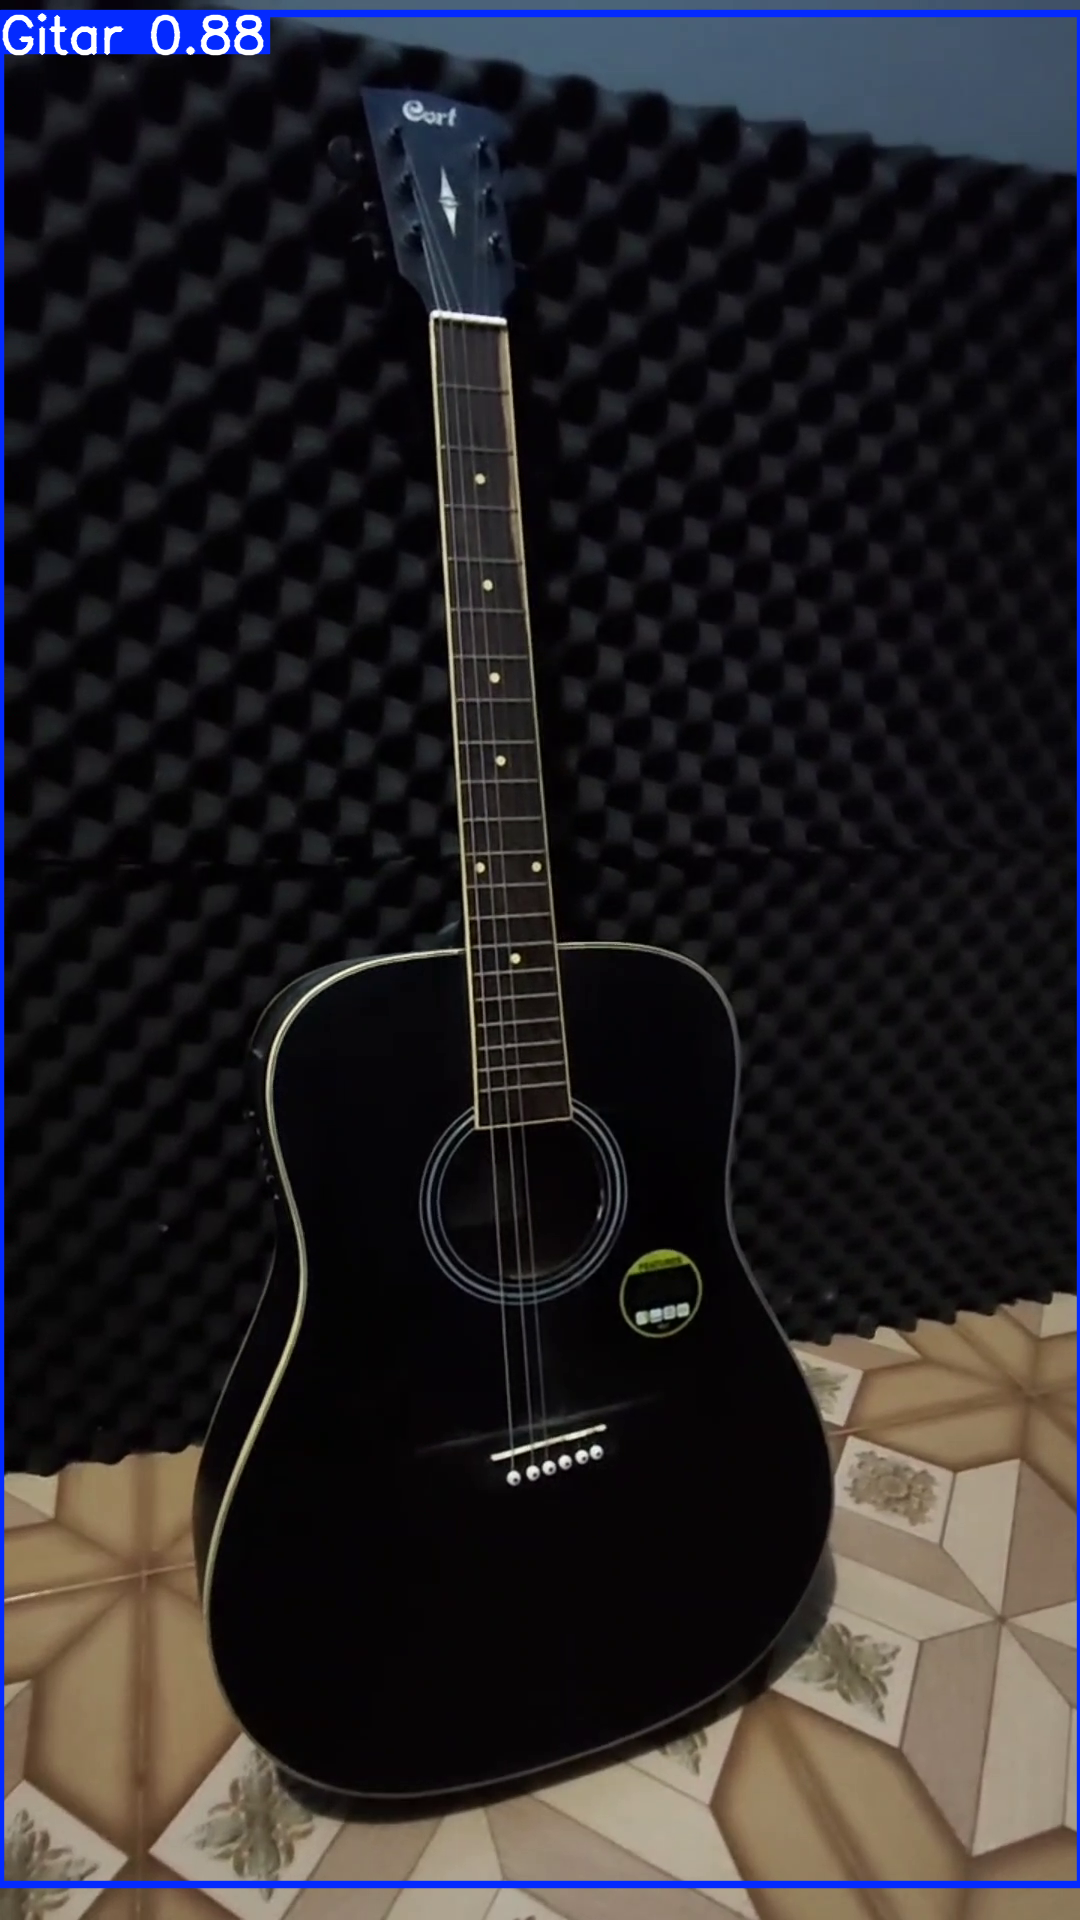


0: 640x384 1 Gitar, 10.4ms
Speed: 3.7ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 9.3ms
Speed: 3.5ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 9.5ms
Speed: 3.4ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 10.5ms
Speed: 4.4ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 11.7ms
Speed: 3.8ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 10.6ms
Speed: 3.5ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Gitar, 9.2ms
Speed: 4.0ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x

In [9]:
# Path video input dari Google Drive
video_path = '/content/drive/MyDrive/testvideo/Test.mp4'  # Ganti dengan path video Anda

# Path untuk menyimpan hasil output video
output_path = '/content/drive/MyDrive/testvideo/hasil.mp4'  # Ganti dengan path output yang diinginkan

# Buka video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Tidak dapat membuka video.")
    exit()

# Dapatkan properti video untuk output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Buat VideoWriter untuk menyimpan hasil
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Proses video frame per frame
frame_count = 0
print("Memulai proses prediksi pada video...")

# Untuk Google Colab
try:
    from google.colab.patches import cv2_imshow
    is_colab = True
except:
    is_colab = False

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Lakukan prediksi
    results = model.predict(frame, conf=0.5)  # Threshold confidence 0.5

    # Visualisasi hasil prediksi
    annotated_frame = results[0].plot()

    # Tulis frame yang telah di-annotasi ke output video
    out.write(annotated_frame)

    # Tampilkan progress setiap 50 frame
    frame_count += 1
    if frame_count % 50 == 0:
        print(f"Diproses {frame_count} frame...")

        # Tampilkan contoh frame (opsional)
        if frame_count == 50:  # Tampilkan frame ke-50 sebagai contoh
            if is_colab:
                cv2_imshow(annotated_frame)
            else:
                cv2.imshow('Sample Frame', annotated_frame)
                cv2.waitKey(0)


# Bersihkan
cap.release()
out.release()

print(f"\nProses selesai! Video hasil disimpan di: {output_path}")